# Data Cleaning - Bank Marketing

**Objetivo:**  
Preparar o dataset **Bank Marketing** para análise, tratando valores ausentes, criando variáveis derivadas e exportando a versão final limpa.

**Passos principais:**  
1. Carregar dataset original (`bank-additional-full.csv`).  
2. Tratar valores ausentes e inconsistências.  
3. Criar novas variáveis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%reload_ext watermark
%watermark -a "Vitória Bitencourt"

Author: Vitória Bitencourt



In [3]:
list_labels_missing_values = ['n/a', 'na', 'undefined']

In [4]:
df_raw = pd.read_csv('bank-additional-full.csv', sep=';',
                      na_values = list_labels_missing_values,
                      keep_default_na=True
                    )

In [5]:
type(df_raw)

pandas.core.frame.DataFrame

In [6]:
df_raw.shape

(41188, 21)

In [7]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_clean = df_raw.copy()

In [11]:
df_clean.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [12]:
categorical_columns = df_clean.select_dtypes(include = ['object', 'category'])

for column in categorical_columns:
    possible_value = df_clean[column].isin(['unknown']).any()
    print(f"The column '{column}' contains {possible_value}.")

The column 'job' contains True.
The column 'marital' contains True.
The column 'education' contains True.
The column 'default' contains True.
The column 'housing' contains True.
The column 'loan' contains True.
The column 'contact' contains False.
The column 'month' contains False.
The column 'day_of_week' contains False.
The column 'poutcome' contains False.
The column 'y' contains False.


## Identificação de valores 'unknown'

- Antes de aplicar qualquer técnica de imputação ou remoção, identifiquei os campos com valores ausentes codificados como 'unknown'. O gráfico a seguir mostra a porcentagem desses valores por variável, o que guiou minha estratégia de limpeza.

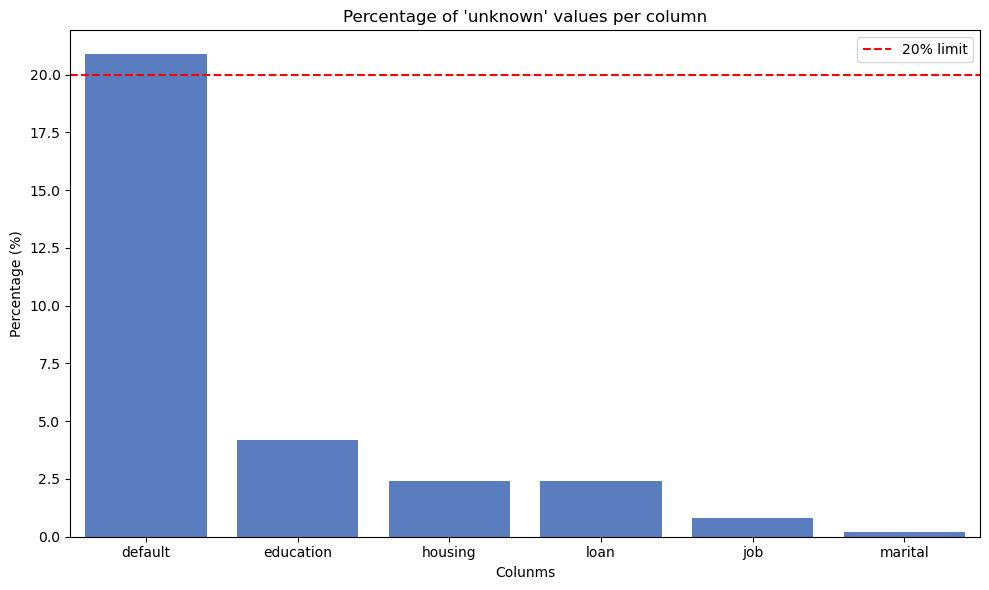

In [13]:
unknown_percent = (categorical_columns == 'unknown').sum() / len(categorical_columns) * 100
unknown_percent = unknown_percent[unknown_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.set_palette('muted')
sns.barplot(y=unknown_percent.values, x=unknown_percent.index)
plt.title("Percentage of 'unknown' values per column")
plt.xlabel("Colunms")
plt.ylabel("Percentage (%)")
plt.axhline(y=20.0, linestyle='--', color='red', label='20% limit')
plt.legend()
plt.tight_layout()
plt.show()

## Tratamento dos valores 'unknown'

- Seis colunas categóricas do dataset apresentavam o valor 'unknown', indicando ausência de informação explícita.

- A coluna default apresentava mais de 20% de valores 'unknown', e por isso foi mantida como categoria válida com o rótulo no_info.

- A coluna education apresentava 4,2% de 'unknown'. Por ser uma proporção pequena, foi substituído pela moda da coluna.

- As colunas housing, loan, job e marital apresentavam proporções abaixo de 5% e sem padrão que justificasse preenchimento. Assim, os registros com 'unknown' nessas colunas foram removidos.

In [14]:
df_clean['default'] = df_clean['default'].replace('unknown', 'no_info')

In [15]:
mode_education = df_clean[df_clean['education'] != 'unknown']['education'].mode()[0]
df_clean['education'] = df_clean['education'].replace('unknown', mode_education)


In [16]:
def remove_unknown(df, cols):

    old = df.shape[0]

    for col in cols:
        df = df[df[col] != 'unknown']

    new = df.shape[0]
    removed = old - new

    print(f"{removed} linhas com 'unknown' foram removidas.")
    return df


In [17]:
cols_remover = ['housing', 'loan', 'job', 'marital']
df_clean = remove_unknown(df_clean, cols_remover)

1385 linhas com 'unknown' foram removidas.


In [18]:
unknown_percent = (df_clean == 'unknown').sum() / len(categorical_columns) * 100
unknown_percent = unknown_percent[unknown_percent > 0].sort_values(ascending=False)
unknown_percent


Series([], dtype: float64)

In [19]:
cols = ['housing', 'loan', 'job', 'marital', 'default', 'education']
for col in cols:
    df_clean[col] = df_clean[col].str.strip().str.lower()

In [20]:
for col in cols:
    df_clean[col] = df_clean[col].str.strip('.')

In [21]:
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [22]:
def func_drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace = True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("Nenhuma linha duplicada foi encontrada.")
    else:
        print(f"{count} linhas duplicatas foram encontradas e removidas.")

In [23]:
func_drop_duplicates(df_clean)

12 linhas duplicatas foram encontradas e removidas.


In [24]:
df_clean.shape

(39791, 21)

In [25]:
class Outlier:

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def count_outliers(self, Q1, Q3, IQR, columns):
        
        # Define o limite de corte para considerar um valor como outlier
        cut_off = IQR * 1.5
        
        # Cria um DataFrame temporário com valores booleanos indicando outliers
        temp_df = (self.df[columns] < (Q1 - cut_off)) | (self.df[columns] > (Q3 + cut_off))
        
        # Retorna a contagem de outliers para cada coluna
        return [len(temp_df[temp_df[col] == True]) for col in temp_df]

    def calc_skew(self, columns=None):
        
        # Se nenhuma coluna for especificada, utiliza todas as colunas do DataFrame
        if columns == None:
            columns = self.df.columns
        
        return [self.df[col].skew() for col in columns]

    def percentage(self, list):
        return [str(round(((value/39791) * 100), 2)) + '%' for value in list]

    # Função para remover outliers nas colunas especificadas
    def limit_definition_calculation(self, columns):
        for col in columns:
            
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            
            IQR = Q3 - Q1
            
            # Define os limites para considerar um valor como outlier
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off
            
    def getOverview(self, columns) -> None:
        
        min = self.df[columns].min()
        Q1 = self.df[columns].quantile(0.25)
        median = self.df[columns].quantile(0.5)
        Q3 = self.df[columns].quantile(0.75)
        
        max = self.df[columns].max()
        IQR = Q3 - Q1
        skew = self.calc_skew(columns)
        outliers = self.count_outliers(Q1, Q3, IQR, columns)
        cut_off = IQR * 1.5
        lower, upper = Q1 - cut_off, Q3 + cut_off
        
        new_columns = ['Column name', 
                       'Min', 
                       'Q1', 
                       'Median', 
                       'Q3', 
                       'Max', 
                       'IQR', 
                       'Lower fence', 
                       'Upper fence', 
                       'Skew', 
                       'Num_Outliers', 
                       'Percent_Outliers' ]
        
        data = zip([column for column in self.df[columns]], min, Q1, median, Q3, max, IQR, lower, upper, skew, outliers, self.percentage(outliers))
        new_df = pd.DataFrame(data = data, columns = new_columns)
        
        new_df.set_index('Column name', inplace = True)
        
        return new_df.sort_values('Num_Outliers', ascending = False).transpose()

In [26]:
Outlier = Outlier(df_clean)

In [27]:
columns_list = df_clean.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [28]:
columns_list

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [29]:
Outlier.getOverview(columns_list)

Column name,previous,duration,campaign,pdays,age,cons.conf.idx,emp.var.rate,cons.price.idx,euribor3m,nr.employed
Min,0.0,0.0,1.0,0.0,17.0,-50.8,-3.4,92.201,0.634,4963.6
Q1,0.0,102.0,1.0,999.0,32.0,-42.7,-1.8,93.075,1.344,5099.1
Median,0.0,180.0,2.0,999.0,38.0,-41.8,1.1,93.749,4.857,5191.0
Q3,0.0,320.0,3.0,999.0,47.0,-36.4,1.4,93.994,4.961,5228.1
Max,7.0,4918.0,43.0,999.0,98.0,-26.9,1.4,94.767,5.045,5228.1
IQR,0.0,218.0,2.0,0.0,15.0,6.3,3.2,0.919,3.617,129.0
Lower fence,0.0,-225.0,-2.0,999.0,9.5,-52.15,-6.6,91.6965,-4.0815,4905.6
Upper fence,0.0,647.0,6.0,999.0,69.5,-26.95,6.2,95.3725,10.3865,5421.6
Skew,3.843018,3.262873,4.693926,-4.936601,0.793219,0.306097,-0.718934,-0.224248,-0.706083,-1.04245
Num_Outliers,5431,2847,2311,1456,453,426,0,0,0,0


In [30]:
previous_range = [0, 1, 3, 5, 7, float('inf')]
labels_range = ['0', '1-2', '3-4', '5-6', '7 or more']
df_clean['previous_calls'] = pd.cut(df_clean['previous'], bins = previous_range, labels = labels_range, right=False)

In [31]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_calls
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,no_info,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [32]:
df_clean.drop('previous', axis = 1, inplace = True)

In [33]:
df_clean['previous_calls'].value_counts().sort_index()

previous_calls
0            34360
1-2           5134
3-4            273
5-6             23
7 or more        1
Name: count, dtype: int64

In [34]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_calls
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,no_info,no,no,telephone,may,mon,...,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [35]:
def plot_box(df, col, figsize=(6,5)):
    
    plt.figure(figsize=figsize)
    sns.boxplot(data=df,
                x=col, 
                palette="viridis")
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

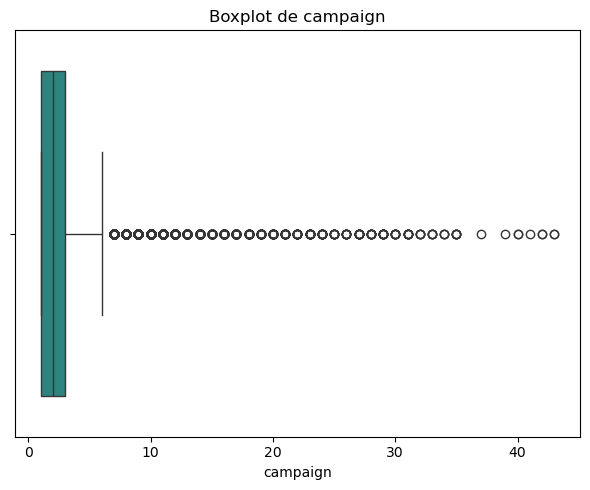

In [36]:
plot_box(df_clean, 'campaign')

In [37]:
df_clean['excessive_calls'] = df_clean['campaign'] > 6

In [38]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_calls,excessive_calls
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
1,57,services,married,high.school,no_info,no,no,telephone,may,mon,...,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False


In [39]:
df_clean['excessive_calls'].value_counts(normalize=True)

excessive_calls
False    0.941922
True     0.058078
Name: proportion, dtype: float64

In [40]:
df_clean['previously_contacted'] = df_clean['pdays'] != 999

In [41]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_calls,excessive_calls,previously_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False
1,57,services,married,high.school,no_info,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False


In [42]:
df_clean['previously_contacted'].value_counts(normalize=True)

previously_contacted
False    0.963409
True     0.036591
Name: proportion, dtype: float64

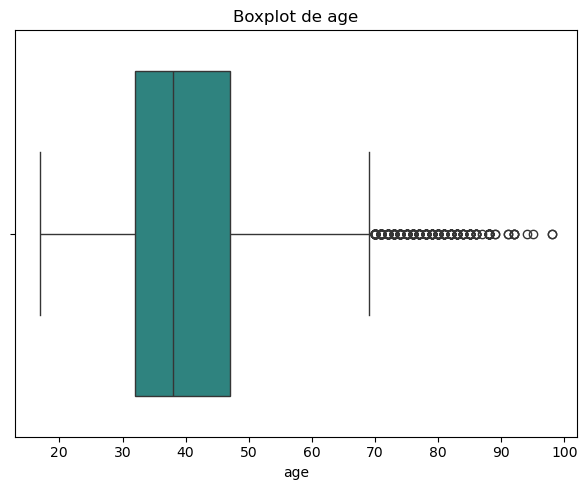

In [43]:
plot_box(df_clean, 'age')

In [44]:
age_range = [0, 25, 35, 45, 55, 65, float('inf')] 

In [45]:
age_labels =  ['Under 25', '25-34', '35-44', '45-54', '55-64', '65 or older']

In [46]:
df_clean['age_range'] = pd.cut(df_clean['age'], bins = age_range, labels = age_labels)

In [47]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_calls,excessive_calls,previously_contacted,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False,55-64
1,57,services,married,high.school,no_info,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False,55-64
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False,35-44
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False,35-44
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,False,False,55-64


In [48]:
df_clean['age_range'].value_counts(normalize=True)

age_range
25-34          0.361539
35-44          0.312784
45-54          0.199115
55-64          0.071222
Under 25       0.040411
65 or older    0.014928
Name: proportion, dtype: float64

In [49]:
df_clean.drop('age', axis = 1, inplace = True)

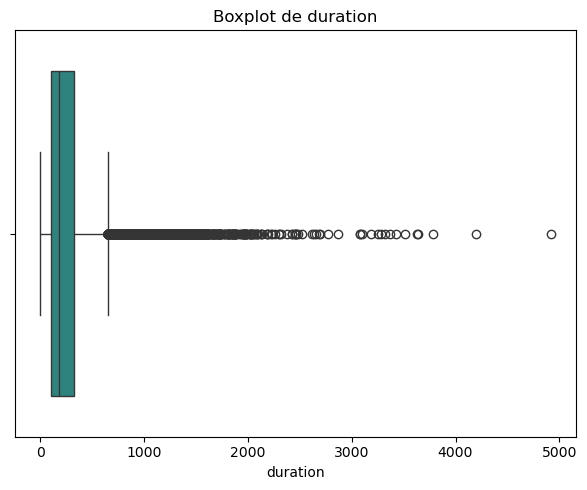

In [50]:
plot_box(df_clean, 'duration')

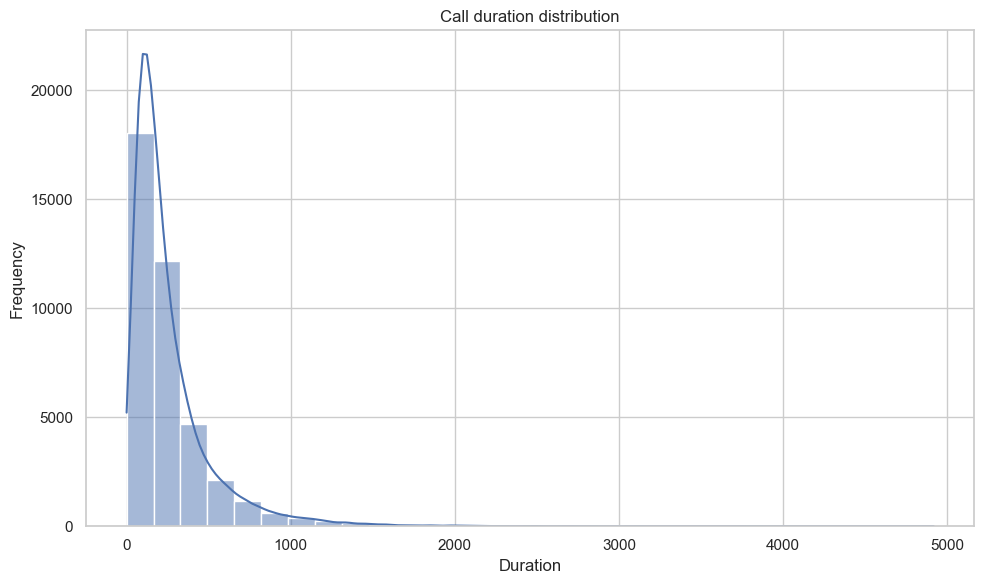

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['duration'],
             kde=True, 
             bins=30)
plt.title('Call duration distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [52]:
duration_bins = [0, 60, 120, 180, 300, 600, 1200, float('inf')]
labels = ['<1min', '1-2min', '2-3min', '3-5min', '5-10min', '10-20min', '20min+']

df_clean['duration_range'] = pd.cut(df_clean['duration'], bins=duration_bins, labels=labels, right=False)

In [53]:
df_clean.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_calls,excessive_calls,previously_contacted,age_range,duration_range
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,93.994,-36.4,4.857,5191.0,no,0,False,False,55-64,3-5min
1,services,married,high.school,no_info,no,no,telephone,may,mon,149,...,93.994,-36.4,4.857,5191.0,no,0,False,False,55-64,2-3min
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,93.994,-36.4,4.857,5191.0,no,0,False,False,35-44,3-5min
3,admin,married,basic.6y,no,no,no,telephone,may,mon,151,...,93.994,-36.4,4.857,5191.0,no,0,False,False,35-44,2-3min
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,93.994,-36.4,4.857,5191.0,no,0,False,False,55-64,5-10min


In [54]:
df_clean['duration_range'].value_counts(normalize=True)

duration_range
3-5min      0.227212
1-2min      0.209168
5-10min     0.189339
2-3min      0.188334
<1min       0.101430
10-20min    0.072127
20min+      0.012390
Name: proportion, dtype: float64

In [55]:
df_clean.to_csv("dados_tratados.csv", index=False)